
# Logistic Regression with Python

For this lecture we will be working with the [Titanic Data Set from Kaggle](https://www.kaggle.com/c/titanic). This is a very famous data set and very often is a student's first step in machine learning! 

We'll be trying to predict a classification- survival or deceased.
Let's begin our understanding of implementing Logistic Regression in Python for classification.

We'll use a "semi-cleaned" version of the titanic data set, if you use the data set hosted directly on Kaggle, you may need to do some additional cleaning not shown in this lecture notebook.

## Import Libraries
Let's import some libraries to get started!

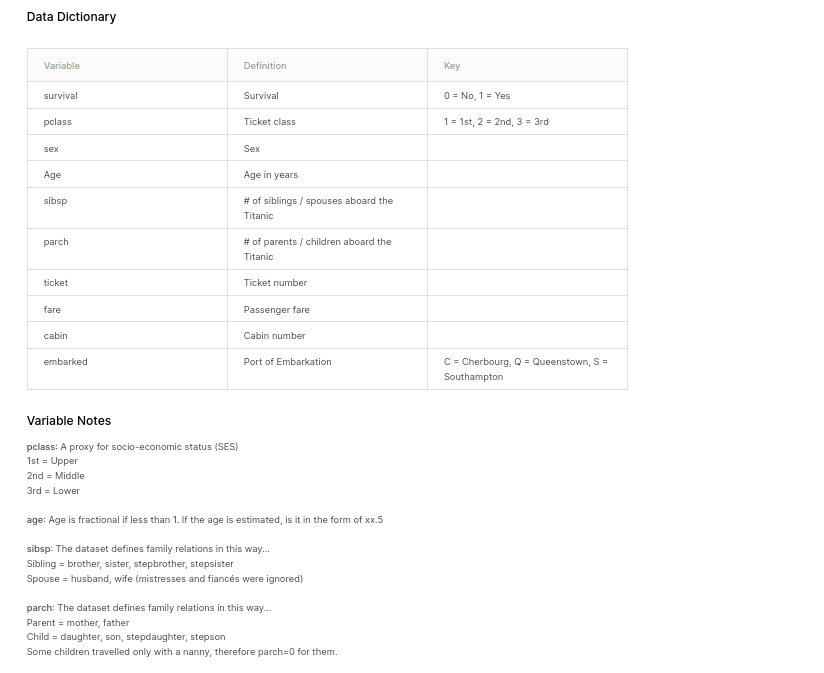

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## The Data

Let's start by reading in the titanic_train.csv file into a pandas dataframe.

In [2]:
import os

In [3]:
os.getcwd()

'F:\\TopMentor\\Batch-63\\Machine Learning\\Logistic Regression'

In [4]:
os.listdir()

['.ipynb_checkpoints',
 '01-Logistic Regression with Python-Copy1.ipynb',
 '01-Logistic Regression with Python.ipynb',
 '02-Logistic Regression Project.ipynb',
 '03-Logistic Regression Project - Solutions.ipynb',
 'advertising.csv',
 'Confusion metric calculation  with 3 threshold cases.xlsx',
 "Confusion metric calculation hand's on.xlsx",
 'Confusion metric calculation.xlsx',
 'Logistic Regression and metrices 13thNov,2022.docx',
 'Logistic Regression and metrices.docx',
 'logistic_regeression Simgoid Function.ipynb',
 'Python_Linear_regression_Demostration-Batch-63-Copy1.ipynb',
 'screen1.png',
 'titanic_test.csv',
 'titanic_train.csv',
 '~$Confusion metric calculation  with 3 threshold cases.xlsx',
 "~$Confusion metric calculation hand's on.xlsx",
 '~$gistic Regression and metrices 13thNov,2022.docx',
 '~$gistic Regression and metrices.docx',
 '~WRL0503.tmp']

In [5]:
train = pd.read_csv('titanic_train.csv')

In [6]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# Exploratory Data Analysis

Let's begin some exploratory data analysis! We'll start by checking out missing data!

## Missing Data

We can use seaborn to create a simple heatmap to see where we are missing data!

In [8]:
train.isnull().sum()/len(train) *100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

<AxesSubplot:>

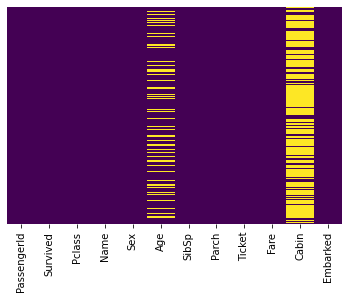

In [9]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

Roughly 20 percent of the Age data is missing. The proportion of Age missing is likely small enough for reasonable replacement with some form of imputation. Looking at the Cabin column, it looks like we are just missing too much of that data to do something useful with at a basic level. We'll probably drop this later, or change it to another feature like "Cabin Known: 1 or 0"

Let's continue on by visualizing some more of the data! Check out the video for full explanations over these plots, this code is just to serve as reference.

In [10]:
train['Survived'].value_counts(normalize=True)

0    0.616162
1    0.383838
Name: Survived, dtype: float64

<AxesSubplot:xlabel='Survived', ylabel='count'>

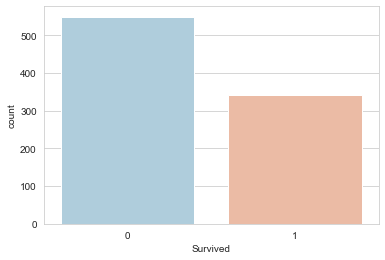

In [11]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',data=train,palette='RdBu_r')

**In this datset 61% of people died of crash and 38% of people survived the titanic crash.**

<AxesSubplot:xlabel='Survived', ylabel='count'>

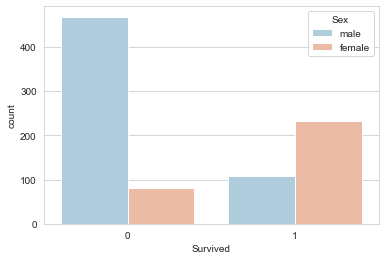

In [12]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Sex',data=train,palette='RdBu_r')

**Out of the all survived travellers.**
* Number of  Female count is more compared to Male.

**Out of deceased travellers.**
* Number of Male casuality is more in comparison to Female.

<AxesSubplot:xlabel='Survived', ylabel='count'>

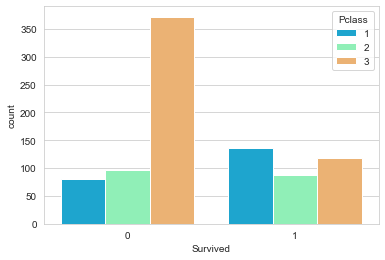

In [13]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Pclass',data=train,palette='rainbow')

**Out of Deceased people.**
> Count of people with lower socio-economic status is most, followed by middle class and last upper class.

**Out of survived people.**
> Count of people with higher socio-economic status is more followed by lower class and lastly middle class.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age'>

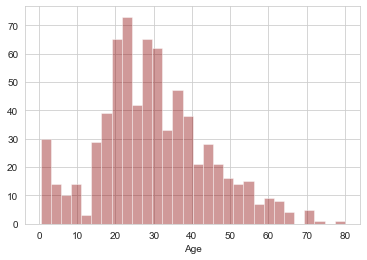

In [14]:
sns.distplot(train['Age'].dropna(),kde=False,color='darkred',bins=30)

From distibution plot it can be inferred that people within age group 20-30 are highest.

<AxesSubplot:>

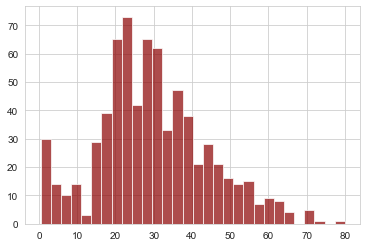

In [15]:
train['Age'].hist(bins=30,color='darkred',alpha=0.7)

<AxesSubplot:xlabel='SibSp', ylabel='count'>

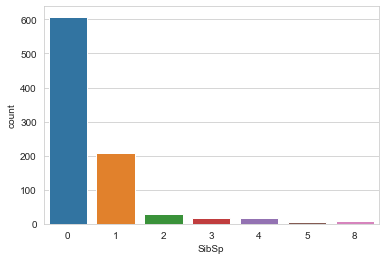

In [16]:
sns.countplot(x='SibSp',data=train)

<AxesSubplot:xlabel='Parch', ylabel='count'>

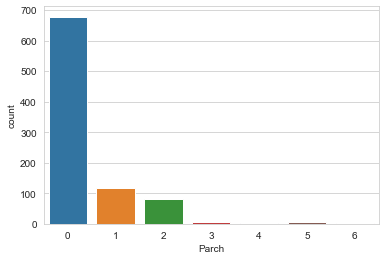

In [17]:
sns.countplot(x='Parch',data=train)

Most travellers were travelling alone without spouse or sibling / parent or childerns.

<AxesSubplot:>

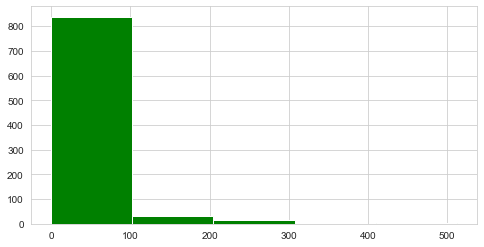

In [18]:
train['Fare'].hist(color='green',bins=5,figsize=(8,4))

For Most passangers fares are between 0-100 dollar.

<AxesSubplot:xlabel='Embarked', ylabel='count'>

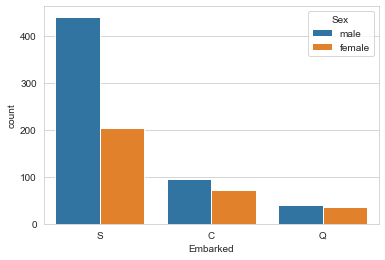

In [19]:
sns.countplot(x='Embarked',hue ='Sex',data=train)

Most people have embarked on the ship from southamptom.

In [20]:
! pip install cufflinks --quiet

In [21]:
import cufflinks as cf
cf.go_offline()

In [22]:
train['Fare'].iplot(kind='hist',bins=30,color='green')

___
## Data Cleaning
We want to fill in missing age data instead of just dropping the missing age data rows. One way to do this is by filling in the mean age of all the passengers (imputation).
However we can be smarter about this and check the average age by passenger class. For example:


<AxesSubplot:xlabel='Pclass', ylabel='Age'>

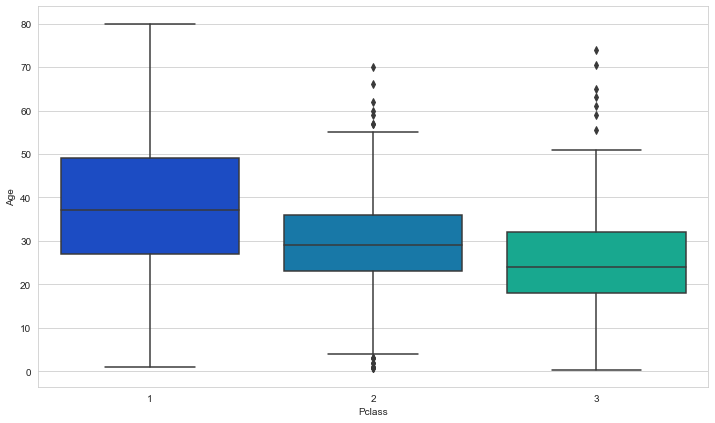

In [23]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='Pclass',y='Age',data=train,palette='winter')

We can see the wealthier passengers in the higher classes tend to be older, which makes sense. We'll use these average age values to impute based on Pclass for Age.

In [24]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return 37

        elif Pclass == 2:
            return 29

        else:
            return 24

    else:
        return Age

Now apply that function!

In [25]:
train['Age'] = train[['Age','Pclass']].apply(impute_age,axis=1)

Now let's check that heat map again!

In [26]:
train['Age'].isnull().sum()

0

<AxesSubplot:>

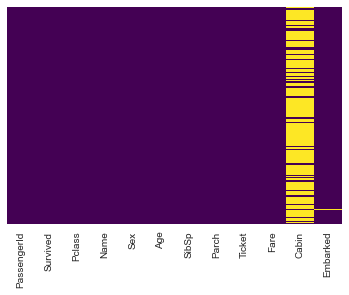

In [27]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

Great! Let's go ahead and drop the Cabin column and the row in Embarked that is NaN.

In [28]:
train.drop('Cabin',axis=1,inplace=True)

In [29]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [30]:
train.dropna(inplace=True)

## Converting Categorical Features 

We'll need to convert categorical features to dummy variables using pandas! Otherwise our machine learning algorithm won't be able to directly take in those features as inputs.

In [31]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


In [32]:
sex = pd.get_dummies(train['Sex'])
embark = pd.get_dummies(train['Embarked'])

In [33]:
sex

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
...,...,...
886,0,1
887,1,0
888,1,0
889,0,1


In [34]:
embark

,C,Q,S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1
...,...,...,...
886,0,0,1
887,0,0,1
888,0,0,1
889,1,0,0


In [35]:
train.drop(['PassengerId','Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

In [36]:
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare
0,0,3,22.0,1,0,7.2500
1,1,1,38.0,1,0,71.2833
2,1,3,26.0,0,0,7.9250
3,1,1,35.0,1,0,53.1000
4,0,3,35.0,0,0,8.0500


In [37]:
train = pd.concat([train,sex,embark],axis=1)

In [38]:
train

,Survived,Pclass,Age,SibSp,Parch,Fare,female,male,C,Q,S
0,0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,1,38.0,1,0,71.2833,1,0,1,0,0
2,1,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,1,35.0,1,0,53.1000,1,0,0,0,1
4,0,3,35.0,0,0,8.0500,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000,0,1,0,0,1
887,1,1,19.0,0,0,30.0000,1,0,0,0,1
888,0,3,24.0,1,2,23.4500,1,0,0,0,1
889,1,1,26.0,0,0,30.0000,0,1,1,0,0


Great! Our data is ready for our model!

# Building a Logistic Regression model

Let's start by splitting our data into a training set and test set (there is another test.csv file that you can play around with in case you want to use all this data for training).

## Train Test Split

In [39]:
train.columns

Index(['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'female', 'male',
       'C', 'Q', 'S'],
      dtype='object')

In [40]:
from sklearn.model_selection import train_test_split

In [41]:
X_cols = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'female', 'male',
       'C', 'Q', 'S']
y_cols = 'Survived'

X = train[X_cols]
y = train[y_cols]

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, test_size=0.30, 
                                                    random_state=101)

In [43]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((622, 10), (267, 10), (622,), (267,))

In [44]:
## Another way to acheive same result:

# X = train.drop('Survived')
# y = train['Survived']

# X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.30, random_state=101)

# train.drop('Survived',axis=1).columns

# X_train, X_test, y_train, y_test = train_test_split(train.drop('Survived',axis=1), train['Survived'], test_size=0.30,random_state=101)

# X_train.shape, X_test.shape, y_train.shape, y_test.shape

## Training and Predicting

In [45]:
from sklearn.linear_model import LogisticRegression

In [46]:
model = LogisticRegression()

In [47]:
model.fit(X_train,y_train)

C:\Users\theve\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression()

In [48]:
predictions = model.predict(X_test)
predictions # default threshold 0.5

array([0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 1], dtype=int64)

In [49]:
probability = model.predict_proba(X_test)
# probability
probability[:,1]

array([0.10847206, 0.12982954, 0.76858693, 0.92827048, 0.13148167,
       0.03451485, 0.11758312, 0.21825371, 0.07349848, 0.60375687,
       0.78327669, 0.95617217, 0.10844408, 0.63836132, 0.10873552,
       0.12441365, 0.91491589, 0.84523886, 0.55410237, 0.09767044,
       0.10858328, 0.08820511, 0.39555289, 0.30808222, 0.05353569,
       0.43019423, 0.63573415, 0.50705382, 0.11269871, 0.29883382,
       0.09911868, 0.27799441, 0.01524523, 0.10469835, 0.10837151,
       0.13594732, 0.71637786, 0.05694284, 0.10953601, 0.11369709,
       0.5407851 , 0.1423508 , 0.12022376, 0.93266366, 0.62079884,
       0.10609299, 0.67657229, 0.88496331, 0.1023806 , 0.26065299,
       0.47050937, 0.79596827, 0.15993999, 0.12482142, 0.10829069,
       0.065922  , 0.4173926 , 0.08184765, 0.09277564, 0.92321409,
       0.60375687, 0.94088787, 0.88558165, 0.0876232 , 0.16741689,
       0.0423957 , 0.11607038, 0.40353211, 0.05093181, 0.10530773,
       0.33868184, 0.15612677, 0.62961275, 0.88471658, 0.07282

In [50]:
## can be used to generate predictions based on your own threshold
threshold = 0.6
y_pred_pos = probability[:,1]
y_pred_class =  y_pred_pos > threshold
y_pred_class = np.where(y_pred_class==False,0,1)
y_pred_class
# np.where(y_pred_class==True,1,0)

array([0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0])

Let's move on to evaluate our model!

# Evaluation

We can check precision,recall,f1-score using classification report!

In [51]:
threshold = 0.5
y_pred_pos = probability[:,1]
y_true = y_test
y_pred = predictions

### **Confusion Matrix**

It is a common way of presenting true positive (tp), true negative (tn), false positive (fp) and false negative (fn) predictions. Those values are presented in the form of a matrix where the Y-axis shows the true classes while the X-axis shows the predicted classes.

It is calculated on class predictions, which means the outputs from your model need to be thresholded first.

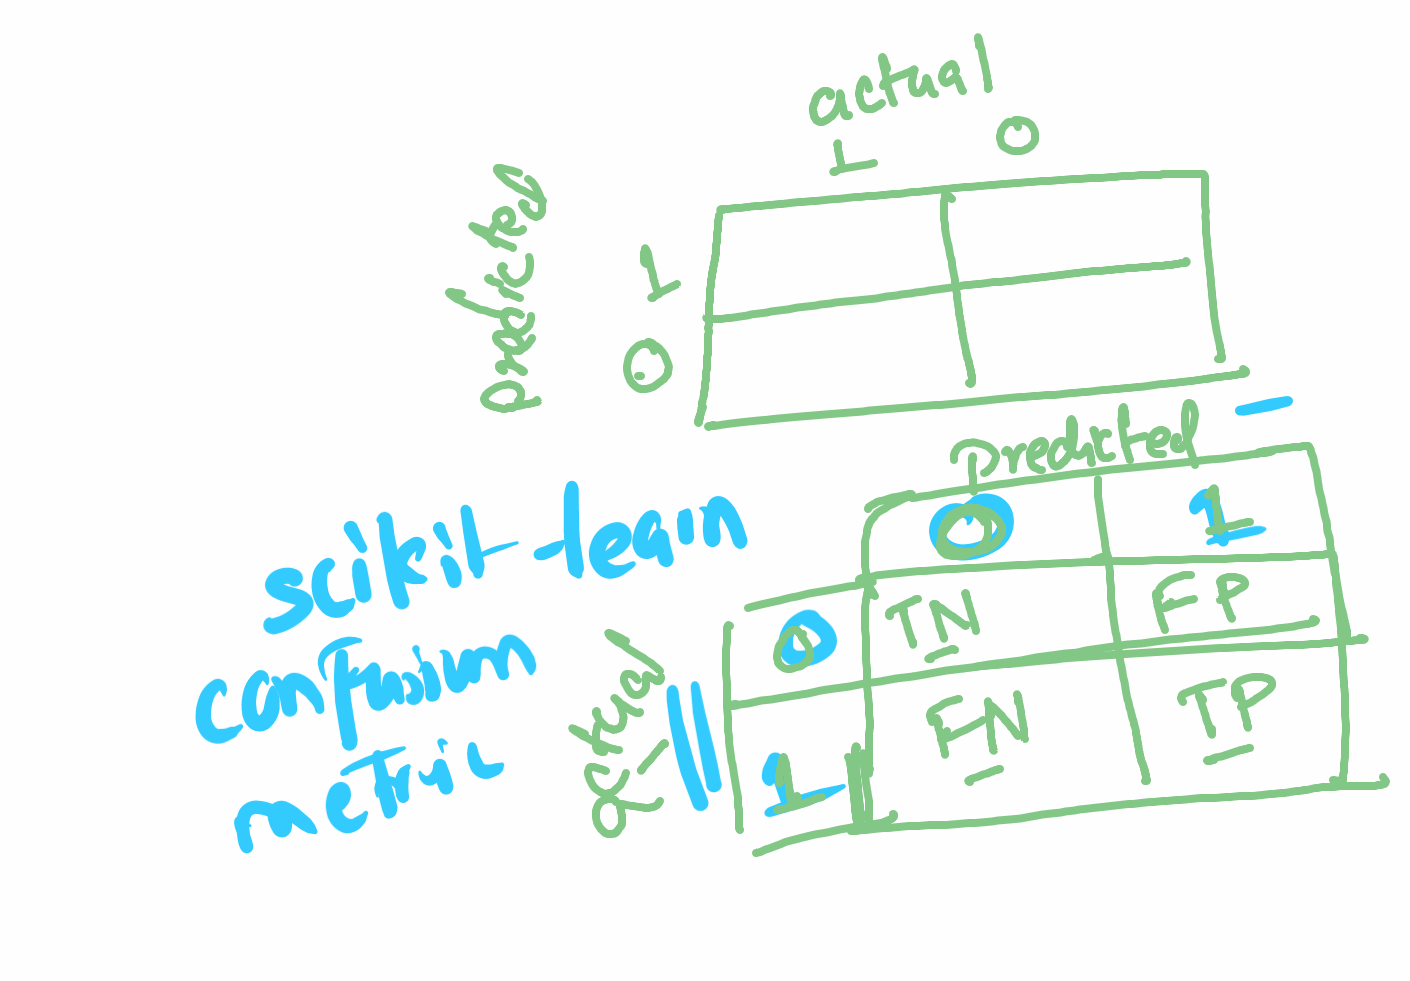

In [52]:
from sklearn.metrics import confusion_matrix

y_pred_class =  y_pred_pos > threshold
cm = confusion_matrix(y_true, y_pred_class)
print("Confusion Matrix: ")
print(cm)
tn, fp, fn, tp = cm.ravel()
print("\n")
print(f"True Positive : {tp} False Positive : {fp}, False Negative : {fn},True Negative : {tn}")

Confusion Matrix: 
[[149  14]
 [ 33  71]]


True Positive : 71 False Positive : 14, False Negative : 33,True Negative : 149


In [53]:
cm.ravel()

array([149,  14,  33,  71], dtype=int64)

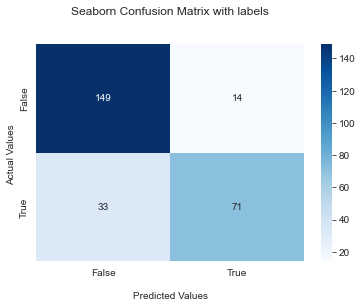

In [54]:
# plotting the confusion matrix:
import seaborn as sns

ax = sns.heatmap(cm, annot=True, cmap='Blues',fmt='g')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

## More ..

### **Accuracy**

It measures how many observations, both positive and negative, were correctly classified.

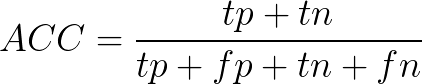
You shouldn’t use accuracy on imbalanced problems. Then, it is easy to get a high accuracy score by simply classifying all observations as the majority class. For example in our case, by classifying all transactions as non-fraudulent we can get an accuracy of over 0.9.

In [55]:
from sklearn.metrics import confusion_matrix, accuracy_score

y_pred_class = y_pred_pos > threshold 
tn, fp, fn, tp = confusion_matrix(y_true, y_pred_class).ravel() 
accuracy = accuracy_score(y_true, y_pred_class)
print(f"Accuracy is : {accuracy}")

Accuracy is : 0.8239700374531835


In [56]:
(tn+tp)/(tn+tp+fn+fp)

0.8239700374531835

### **True Positive Rate | Recall | Sensitivity**

It measures how many observations out of all positive observations have we classified as positive. It tells us how many fraudulent transactions we recalled from all fraudulent transactions.
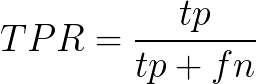

When you are optimizing recall you want to put all guilty in prison.

In [57]:
from sklearn.metrics import confusion_matrix, recall_score

y_pred_class = y_pred_pos > threshold
tn, fp, fn, tp = confusion_matrix(y_true, y_pred_class).ravel()
recall = recall_score(y_true, y_pred_class)
print(f" Recall is : {recall}")

 Recall is : 0.6826923076923077


In [58]:
tp/(tp+fn)

0.6826923076923077

### **Positive Predictive Value | Precision**

It measures how many observations predicted as positive are in fact positive. Taking our fraud detection example, it tells us what is the ratio of transactions correctly classified as fraudulent.
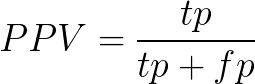

When you are optimizing precision you want to make sure that people that you put in prison are guilty.

In [59]:
from sklearn.metrics import confusion_matrix, precision_score

y_pred_class = y_pred_pos > threshold
tn, fp, fn, tp = confusion_matrix(y_true, y_pred_class).ravel()
precision = precision_score(y_true, y_pred_class)
print(f"Precision is : {precision}")

Precision is : 0.8352941176470589


In [60]:
tp/(tp+fp)

0.8352941176470589

### **F beta score**

Simply put, it combines precision and recall into one metric. The higher the score the better our model is. You can calculate it in the following way:
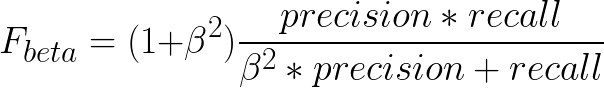
When choosing beta in your F-beta score the more you care about recall over precision the higher beta you should choose. For example, with F1 score we care equally about recall and precision with F2 score, recall is twice as important to us.
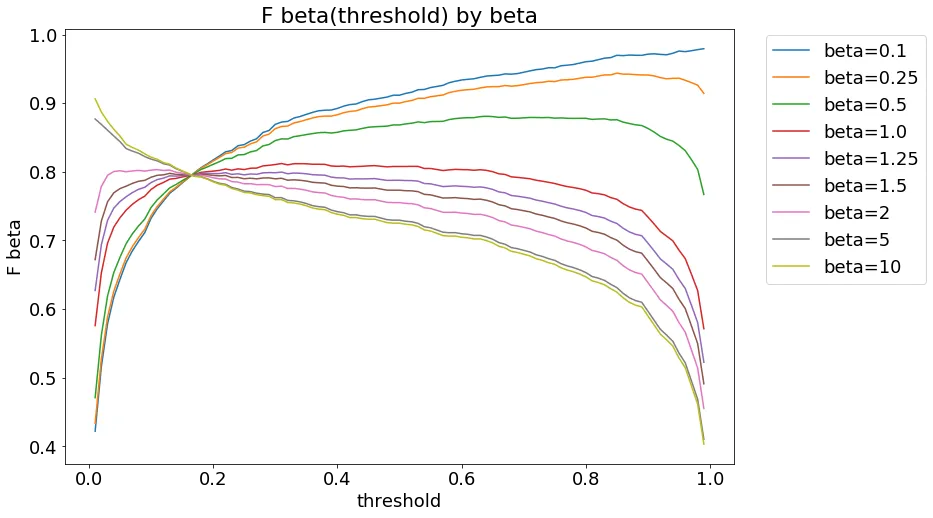
F beta by beta
With 0<beta<1 we care more about precision and so the higher the threshold the higher the F beta score. When beta>1 our optimal threshold moves toward lower thresholds and with beta=1 it is somewhere in the middle.

#### **F1 score (beta=1)**

It’s the harmonic mean between precision and recall.

In [61]:
from sklearn.metrics import f1_score
y_pred_class = y_pred_pos > threshold
f1= f1_score(y_true, y_pred_class)
print(f"F1 Score  is : {f1}")

F1 Score  is : 0.7513227513227515


In [72]:
2*recall*precision/(recall+precision)

0.7513227513227515

In [62]:
! pip install scikit-plot # --quiet

ERROR: Invalid requirement: '#'


#### **ROC Curve**

An ROC curve (receiver operating characteristic curve) is a graph showing the performance of a classification model at all classification thresholds. This curve plots two parameters:

1. True Positive Rate
2. False Positive Rate

* It is a chart that visualizes the tradeoff between true positive rate (TPR) and false positive rate (FPR). 

* Basically, for every threshold, we calculate TPR and FPR and plot it on one chart.

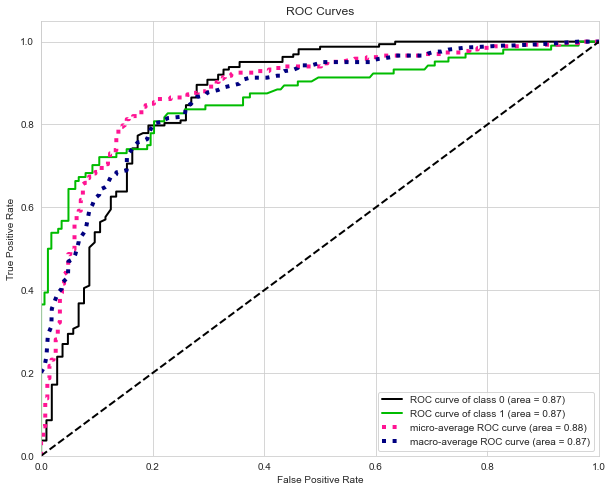

In [63]:
from scikitplot.metrics import plot_roc

fig, ax = plt.subplots(figsize=(10, 8))
plot_roc(y_true, probability, ax=ax)
plt.show()

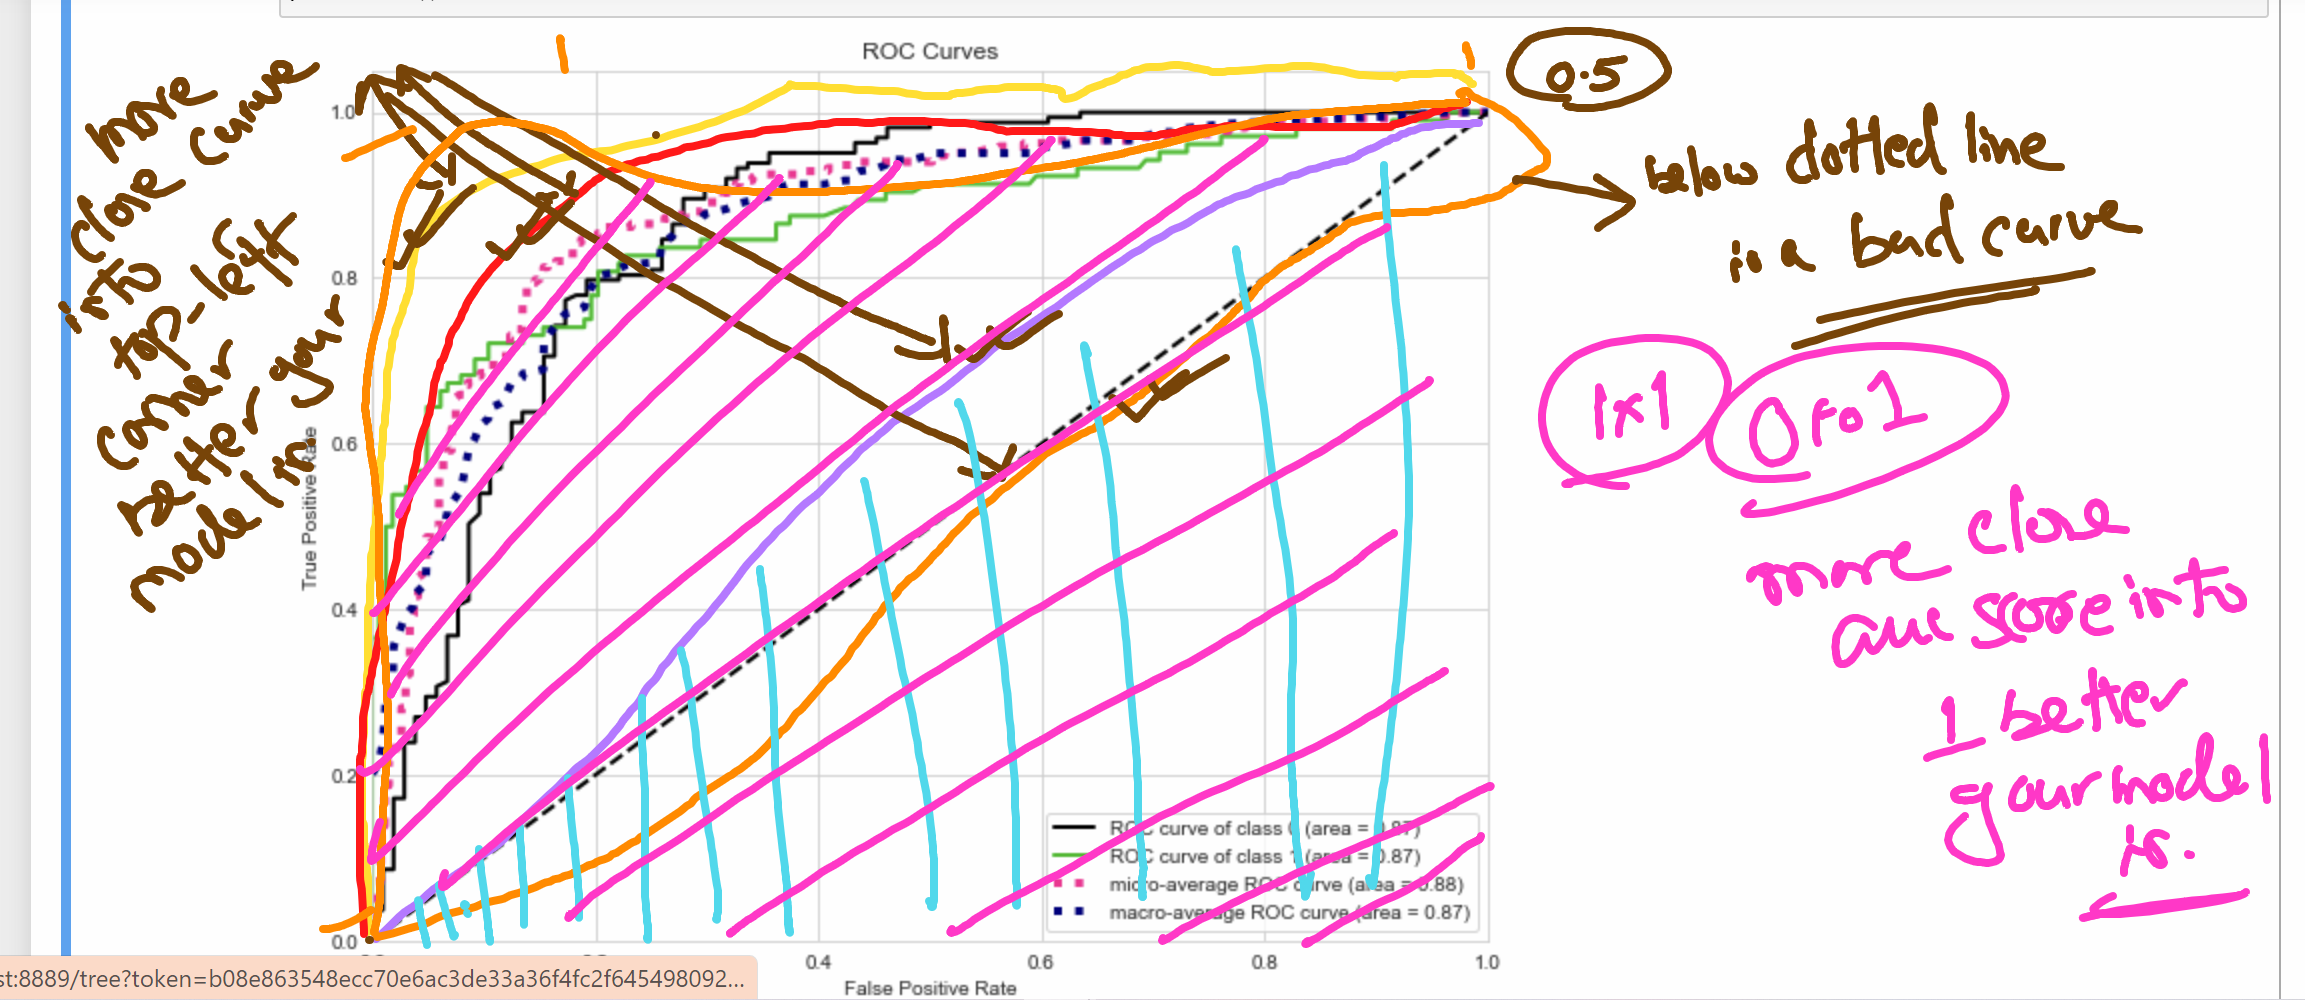

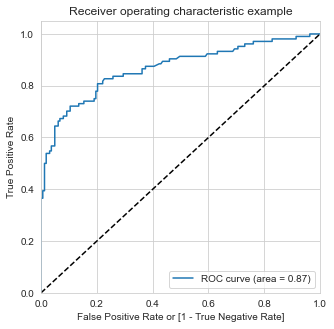

In [66]:
from sklearn import metrics

def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

draw_roc(y_true, y_pred_pos)

### **ROC AUC score**

In order to get one number that tells us how good our curve is, we can calculate the Area Under the ROC Curve, or ROC AUC score. The more top-left your curve is the higher the area and hence higher ROC AUC score.

>Alternatively, it can be shown that ROC AUC score is equivalent to calculating the rank correlation between predictions and targets. From an interpretation standpoint, it is more useful because it tells us that this metric shows how good at ranking predictions your model is. It tells you what is the probability that a randomly chosen positive instance is ranked higher than a randomly chosen negative instance.

In [64]:
from sklearn.metrics import roc_auc_score

roc_auc = roc_auc_score(y_true, y_pred_pos)
print(f" ROC AUC score :  {roc_auc}")

 ROC AUC score :  0.8675967437470504


### **Precision-Recall Curve**

It is a curve that combines precision (PPV) and Recall (TPR) in a single visualization. For every threshold, you calculate PPV and TPR and plot it. The higher on y-axis your curve is the better your model performance.

>You can use this plot to make an educated decision when it comes to the classic precision/recall dilemma. Obviously, the higher the recall the lower the precision. Knowing at which recall your precision starts to fall fast can help you choose the threshold and deliver a better model.

We can see that for the negative class we maintain high precision and high recall almost throughout the entire range of thresholds. For the positive class precision is starting to fall as soon as we are recalling 0.2 of true positives and by the time we hit 0.8, it decreases to around 0.7.

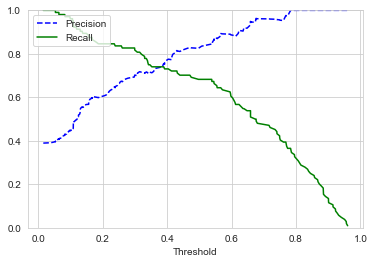

In [65]:
from sklearn.metrics import precision_recall_curve
precisions, recalls, thresholds = precision_recall_curve(y_true, y_pred_pos)

def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.ylim([0, 1])
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()

In [77]:
# Let's create a dataframe to see the values of accuracy, sensitivity, and specificity at different values of probabiity cutoffs

cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    y_pred_class =  y_pred_pos > i
    y_pred_class = np.where(y_pred_class==False,0,1)
    cm1 = metrics.confusion_matrix(y_true, y_pred_class )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.389513  1.000000  0.000000
0.1   0.1  0.524345  0.961538  0.245399
0.2   0.2  0.726592  0.846154  0.650307
0.3   0.3  0.790262  0.807692  0.779141
0.4   0.4  0.812734  0.730769  0.865031
0.5   0.5  0.823970  0.682692  0.914110
0.6   0.6  0.812734  0.596154  0.950920
0.7   0.7  0.786517  0.471154  0.987730
0.8   0.8  0.734082  0.317308  1.000000
0.9   0.9  0.662921  0.134615  1.000000


In [78]:
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

num = [0.31,0.32,0.33,0.34,0.35,0.36,0.37,0.38,0.39]
for i in num:
    y_pred_class =  y_pred_pos > i
    y_pred_class = np.where(y_pred_class==False,0,1)
    cm1 = metrics.confusion_matrix(y_true, y_pred_class )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

      prob  accuracy     sensi     speci
0.31  0.31  0.801498  0.807692  0.797546
0.32  0.32  0.797753  0.798077  0.797546
0.33  0.33  0.790262  0.778846  0.797546
0.34  0.34  0.786517  0.759615  0.803681
0.35  0.35  0.782772  0.740385  0.809816
0.36  0.36  0.794007  0.740385  0.828221
0.37  0.37  0.797753  0.740385  0.834356
0.38  0.38  0.797753  0.740385  0.834356
0.39  0.39  0.801498  0.730769  0.846626


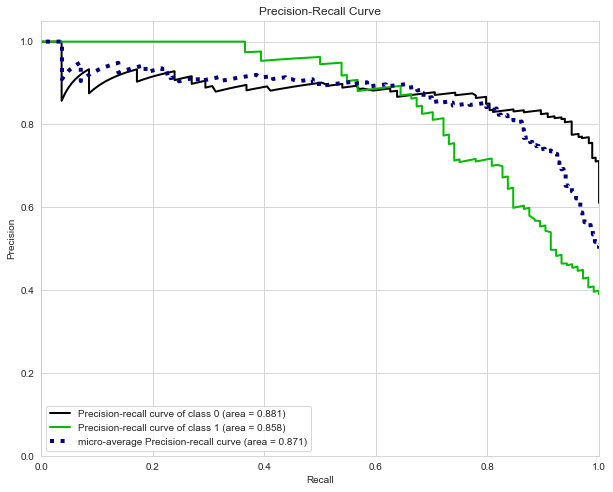

In [76]:
from scikitplot.metrics import plot_precision_recall

fig, ax = plt.subplots(figsize=(10, 8))
plot_precision_recall(y_true, probability, ax=ax)
plt.show()

In [75]:
from sklearn.metrics import classification_report

In [76]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.82      0.91      0.86       163
           1       0.84      0.68      0.75       104

    accuracy                           0.82       267
   macro avg       0.83      0.80      0.81       267
weighted avg       0.83      0.82      0.82       267



Not so bad! You might want to explore other feature engineering and the other titanic_text.csv file, some suggestions for feature engineering:

* Try grabbing the Title (Dr.,Mr.,Mrs,etc..) from the name as a feature
* Maybe the Cabin letter could be a feature
* Is there any info you can get from the ticket?

## Great Job!